# Descripción del proyecto

Contexto:

Eres analista en una gran tienda en línea. Junto con el departamento de marketing has recopilado una lista de hipótesis que pueden ayudar a aumentar los ingresos. 

Tienes que priorizar estas hipótesis, lanzar un test A/B y analizar los resultados.

# Parte 1. Priorizar hipótesis

El archivo hypotheses_us.csv contiene nueve hipótesis sobre cómo aumentar los ingresos de una tienda en línea con Reach, Impact, Confidence y Effort especificados para cada una.

El ejercicio consiste en:

* Aplicar el framework ICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
* Aplicar el framework RICE para priorizar hipótesis. Ordenarlas en orden descendente de prioridad.
* Mostrar cómo cambia la priorización de hipótesis cuando utilizas RICE en lugar de ICE. Proporcionar una explicación de los cambios.

**Importar librerías**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats


In [2]:
hipotesis = pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

hipotesis.head(5)

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


**Aplicar el framework ICE para priorizar hipótesis**

In [3]:
hipotesis['ICE'] = (hipotesis['Impact']*hipotesis['Confidence'])/hipotesis['Effort']

hipotesis[['Hypothesis','ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,Launch a promotion that gives users discounts ...,16.200000
0,Add two new channels for attracting traffic. T...,13.333333
7,Add a subscription form to all the main pages....,11.200000
6,Show banners with current offers and sales on ...,8.000000
2,Add product recommendation blocks to the store...,7.000000
1,Launch your own delivery service. This will sh...,2.000000
5,Add a customer review page. This will increase...,1.333333
3,Change the category structure. This will incre...,1.125000
4,Change the background color on the main page. ...,1.000000


El ICE presenta:

* Lanza una promoción que ofrezca a los usuarios descuentos en sus cumpleaños
* Añadir dos nuevos canales para atraer tráfico.

como las hipótesis más prometedoras.

**Aplicar el framework RICE para priorizar hipótesis**

In [4]:
hipotesis['RICE'] = (hipotesis['Reach']*hipotesis['Impact']*hipotesis['Confidence'])/hipotesis['Effort']

hipotesis[['Hypothesis','RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Add a subscription form to all the main pages....,112.0
2,Add product recommendation blocks to the store...,56.0
0,Add two new channels for attracting traffic. T...,40.0
6,Show banners with current offers and sales on ...,40.0
8,Launch a promotion that gives users discounts ...,16.2
3,Change the category structure. This will incre...,9.0
1,Launch your own delivery service. This will sh...,4.0
5,Add a customer review page. This will increase...,4.0
4,Change the background color on the main page. ...,3.0


El RICE presenta:

* Añade un formulario de suscripción a todas las páginas principales
* Agregue bloques de recomendación de productos al sitio de la tienda

como las hipótesis más prometedoras.


De nuevo, las 2 hipótesis más prometedoras bajo el framework RICE, se deben a que sus parámetros Reach son 10 y 8 , los cuales ocupan los valores más altos entre las hipotesis mientras que las otras hipótesis tienen valores más bajos.

Ahora comparemos la puntuación de cada Hipotesis para ambos framework:

In [36]:
hipotesis_comparacion = hipotesis[['Hypothesis', 'RICE', 'ICE']]

# Ordenar por RICE y agregar una columna de ranking por RICE
hipotesis_comparacion['RICE_Rank'] = hipotesis_comparacion['RICE'].rank(ascending=False)

# Ordenar por ICE y agregar una columna de ranking por ICE
hipotesis_comparacion['ICE_Rank'] = hipotesis_comparacion['ICE'].rank(ascending=False)

# Mostrar el DataFrame con las clasificaciones
hipotesis_comparacion = hipotesis_comparacion.sort_values(by='RICE_Rank')
print("Comparación por RICE e ICE:")

hipotesis_comparacion

Comparación por RICE e ICE:


/tmp/ipykernel_51/3050907553.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hipotesis_comparacion['RICE_Rank'] = hipotesis_comparacion['RICE'].rank(ascending=False)
/tmp/ipykernel_51/3050907553.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  hipotesis_comparacion['ICE_Rank'] = hipotesis_comparacion['ICE'].rank(ascending=False)


,Hypothesis,RICE,ICE,RICE_Rank,ICE_Rank
7,Add a subscription form to all the main pages....,112.0,11.200000,1.0,3.0
2,Add product recommendation blocks to the store...,56.0,7.000000,2.0,5.0
0,Add two new channels for attracting traffic. T...,40.0,13.333333,3.5,2.0
6,Show banners with current offers and sales on ...,40.0,8.000000,3.5,4.0
8,Launch a promotion that gives users discounts ...,16.2,16.200000,5.0,1.0
3,Change the category structure. This will incre...,9.0,1.125000,6.0,8.0
1,Launch your own delivery service. This will sh...,4.0,2.000000,7.5,6.0
5,Add a customer review page. This will increase...,4.0,1.333333,7.5,7.0
4,Change the background color on the main page. ...,3.0,1.000000,9.0,9.0


Al comparar ambos frameworks, podemos concluir que las Hipotesis que destacan resultan ser:

* Añadir un formulario de inscripción en todas las páginas principales" 
* Añadir 2 nuevos canales para atraer tráfico". 

Esto dado que ambas hipotesis se encuentran dentro de los 3 primeros lugares en ambos frameworks.

# Parte 2. Análisis de test A/B

Realizaste un test A/B y obtuviste los resultados descritos en los archivos orders_us.csv y visitors_us.csv.

Ejercicio

Analiza el test A/B:

* Representa gráficamente el ingreso acumulado por grupo. Haz conclusiones y conjeturas.
* Representa gráficamente el tamaño de pedido promedio acumulado por grupo. Haz conclusiones y conjeturas.
* Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.
* Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia. Saca conclusiones y haz conjeturas.
* Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.
* Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.
* Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.
* Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.
* Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
* Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.
* Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
* Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.
* Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.

**Procesar los datos**

In [5]:
orders = pd.read_csv('/datasets/orders_us.csv', parse_dates=['date'] , sep=',')

orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


**Es posible que haya errores en los datasets originales; por ejemplo, algunos de los visitantes podrían haber entrado tanto en el grupo A como en el grupo B.**

In [6]:
# Primero, encontramos los usuarios que están en más de un grupo
usuarios_con_multiple_grupo = orders.groupby('visitorId')['group'].nunique()
usuarios_con_multiple_grupo = usuarios_con_multiple_grupo[usuarios_con_multiple_grupo > 1].index

# Luego, filtramos el DataFrame para que solo contenga usuarios que están en un solo grupo
orders_filtrado = orders[~orders['visitorId'].isin(usuarios_con_multiple_grupo)]

# Imprimimos el DataFrame filtrado
orders_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1016 non-null   int64         
 1   visitorId      1016 non-null   int64         
 2   date           1016 non-null   datetime64[ns]
 3   revenue        1016 non-null   float64       
 4   group          1016 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 47.6+ KB


In [7]:
orders_filtrado.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


In [8]:
visits = pd.read_csv('/datasets/visits_us.csv', parse_dates=['date'] , sep=',')

visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [9]:
visits.head(5)

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


**Representa gráficamente el ingreso acumulado por grupo**

In [10]:
daily_orders = orders_filtrado.groupby(["date", "group"])["revenue"].sum().reset_index()
daily_orders.head()

,date,group,revenue
0,2019-08-01,A,2266.6
1,2019-08-01,B,967.2
2,2019-08-02,A,1468.3
3,2019-08-02,B,2568.1
4,2019-08-03,A,1815.2


In [11]:
daily_orders["ingreso_acumulado"] = daily_orders.sort_values(by = "date").groupby("group")["revenue"].cumsum()
daily_orders.head()

,date,group,revenue,ingreso_acumulado
0,2019-08-01,A,2266.6,2266.6
1,2019-08-01,B,967.2,967.2
2,2019-08-02,A,1468.3,3734.9
3,2019-08-02,B,2568.1,3535.3
4,2019-08-03,A,1815.2,5550.1


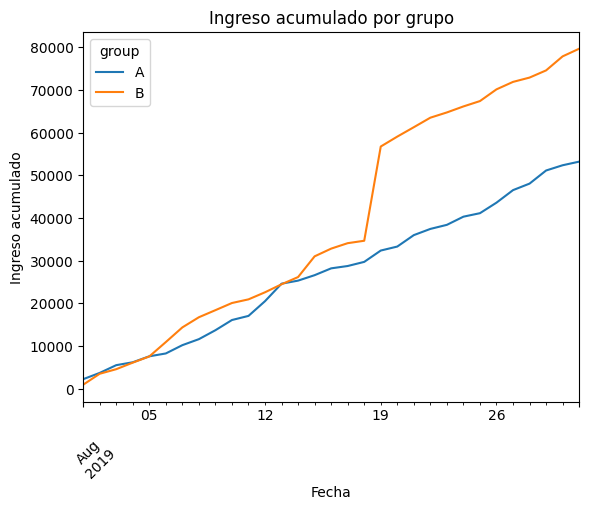

In [12]:
#Graficar el ingreso acumulado por grupo

daily_orders.pivot_table(
    index='date',
    columns='group',
    values='ingreso_acumulado',
    aggfunc='mean'
).plot(kind='line')
plt.title('Ingreso acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('Ingreso acumulado')
plt.gca().tick_params(axis='x', rotation=45)
plt.show()

Se observa que a partir del 19-08-2019 aproximadamente se comenzó con el experimento. Esto dado a que la suma acumulada del grupo B experimenta un salto en el ingreso acumulado.

**Representa gráficamente el tamaño de pedido promedio acumulado por grupo**

Text(0, 0.5, 'n_pedidos')

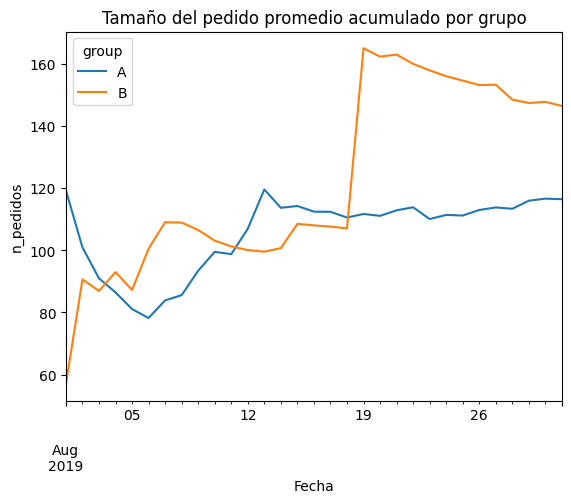

In [13]:
daily_avgs = (
    orders_filtrado
    .groupby(['date', 'group'])
    .agg({
        'visitorId': 'nunique',
        'revenue': 'sum'
    })
    .reset_index()
    .rename(columns={
        'visitorId': 'n_compradores'
    })
)

daily_avgs['cumulative_compradores'] = daily_avgs.sort_values(by='date').groupby('group')['n_compradores'].cumsum()
daily_avgs['cumulative_revenue'] = daily_avgs.sort_values(by='date').groupby('group')['revenue'].cumsum()

#Calcula el promedio acumulado por grupo

daily_avgs['avg_revenue'] = daily_avgs['cumulative_revenue'] / daily_avgs['cumulative_compradores']

daily_avgs_by_group = (
    daily_avgs
    .pivot_table(
        index='date',
        columns='group',
        values='avg_revenue'
    )
)

#Graficar el promedio acumulado por grupo

daily_avgs_by_group.plot(kind='line')
plt.title('Tamaño del pedido promedio acumulado por grupo')
plt.xlabel('Fecha')
plt.ylabel('n_pedidos')

Se observa que inicialmente el tamaño promedio de pedidos es mayor para el grupo A, sin embargo, partir del 19-08-2019 aproximadamente se concluye que comenzó con el experimento. Esto dado a que el pedido promedio acumulado del grupo B experimenta un salto en los pedidos.

**Representa gráficamente la diferencia relativa en el tamaño de pedido promedio acumulado para el grupo B en comparación con el grupo A. Haz conclusiones y conjeturas.**

In [14]:
# Calcula la diferencia entre los grupos A y B
daily_avgs_by_group['difference'] = (
    (daily_avgs_by_group['B'] - daily_avgs_by_group['A'])/daily_avgs_by_group['A']
)

# Imprime el DataFrame resultante para verificar el resultado
daily_avgs_by_group

group,A,B,difference
date,,,
2019-08-01,119.294737,56.894118,-0.523079
2019-08-02,100.943243,90.648718,-0.101983
2019-08-03,90.985246,86.922642,-0.044651
2019-08-04,86.466667,93.007576,0.075647
2019-08-05,81.102128,87.216092,0.075386
2019-08-06,78.226415,100.523853,0.285037
2019-08-07,83.885246,109.035606,0.299819
2019-08-08,85.579412,108.912987,0.272654
2019-08-09,93.428571,106.524855,0.140174


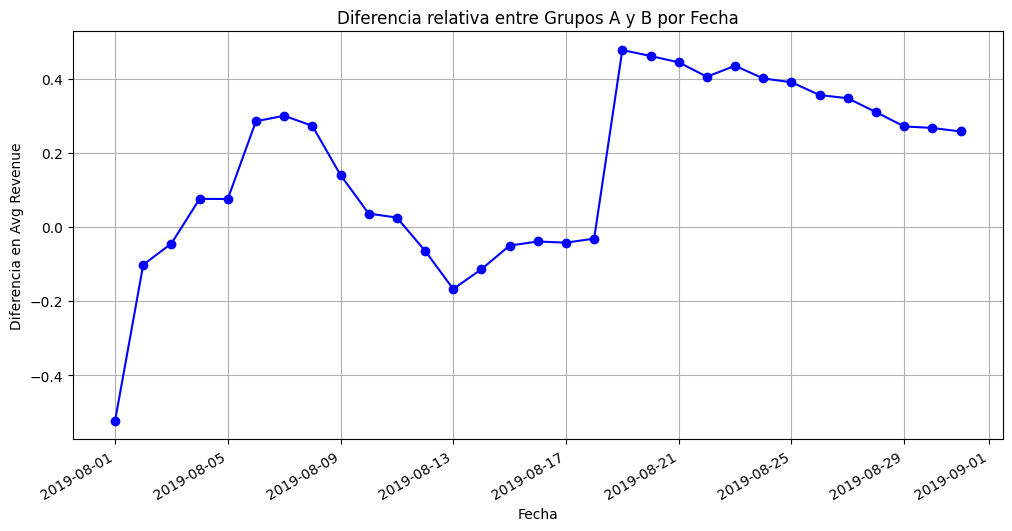

In [15]:
# Crea el gráfico
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
plt.plot(daily_avgs_by_group.index, daily_avgs_by_group['difference'], marker='o', linestyle='-', color='b')

# Añade títulos y etiquetas
plt.title('Diferencia relativa entre Grupos A y B por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en Avg Revenue')
plt.grid(True)

# Ajusta el formato de las fechas en el eje x si es necesario
plt.gcf().autofmt_xdate()

# Muestra el gráfico
plt.show()

Al comienzo de la prueba los resultados cambiaron significativamente de un día a otro, estabilizándose solo después del 19-08-2019 aproximadamente con una diferencia relativa que fluctúa entre 0.3% y 0.4%.

**Calcula la tasa de conversión de cada grupo como la relación entre los pedidos y el número de visitas de cada día. Representa gráficamente las tasas de conversión diarias de los dos grupos y describe la diferencia**

In [16]:
datesGroups = orders_filtrado[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders_filtrado[
        np.logical_and(
            orders_filtrado['date'] <= x['date'], orders_filtrado['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': pd.Series.nunique,
            'visitorId': pd.Series.nunique,
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

In [17]:
visitorsAggregated = datesGroups.apply(
    lambda x: visits[
        np.logical_and(
            visits['date'] <= x['date'], visits['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visits': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

In [18]:
cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'n_orders',
    'n_compradores',
    'revenue',
    'visits',
]


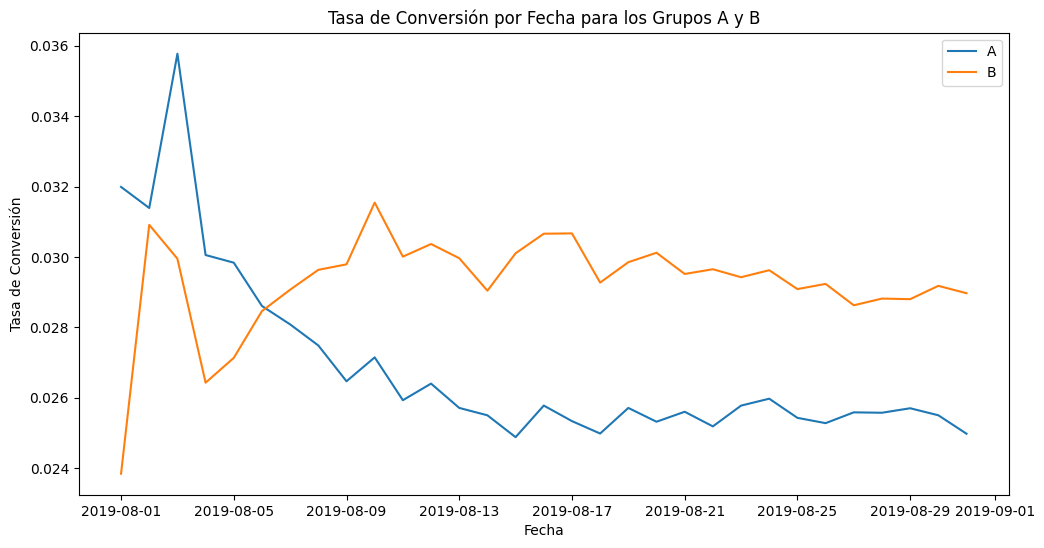

In [19]:
cumulativeData['conversion'] = (
    cumulativeData['n_orders'] / cumulativeData['visits']
)

cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

plt.figure(figsize=(12, 6))

plt.title('Tasa de Conversión por Fecha para los Grupos A y B')
plt.xlabel('Fecha')
plt.ylabel('Tasa de Conversión')

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()


Se observa que al inicio de la prueba, el segmento A tenía una tasa de conversión más alta pero el segmento B ganó gradualmente y se estabilizó en un valor casi constante.

**Traza un gráfico de dispersión del número de pedidos por usuario. Haz conclusiones y conjeturas.**

      visitorId  n_orders
908  3967698036         3
55    249864742         3
478  2108163459         3
687  2988190573         3
890  3908431265         3
138   611059232         3
632  2742574263         3
157   678354126         2
323  1404560065         2
452  1985475298         2


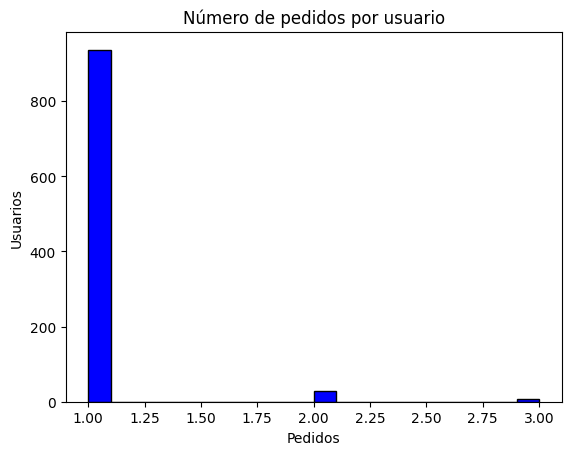

In [20]:
ordersByUsers = (
    orders_filtrado.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'n_orders']

print(ordersByUsers.sort_values(by='n_orders', ascending=False).head(10))

plt.hist(ordersByUsers['n_orders'], bins=20, color='blue', edgecolor='black')

# Añade títulos y etiquetas
plt.title('Número de pedidos por usuario')
plt.xlabel('Pedidos')
plt.ylabel('Usuarios')

# Muestra el gráfico
plt.show()

La mayoría de los usuarios hizo un solo pedido. Sin embargo, no está claro cuántos usuarios hicieron dos, tres o más pedidos. Necesitaremos otro tipo de gráfico.

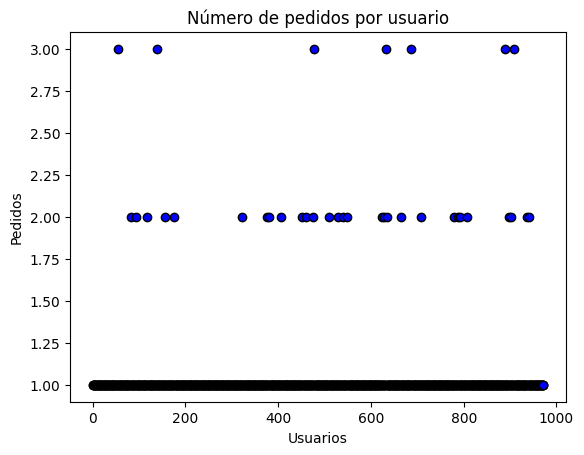

In [21]:
# el rango de números desde 0 hasta el número de observaciones en ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.scatter(x_values, ordersByUsers['n_orders'], color='blue', edgecolor='black')

# Añade títulos y etiquetas
plt.title('Número de pedidos por usuario')
plt.xlabel('Usuarios')
plt.ylabel('Pedidos')

# Muestra el gráfico
plt.show()

Hay muy pocos usuarios con más de dos pedidos. Estos casos también pueden resultar ser anomalías.

**Calcula los percentiles 95 y 99 para el número de pedidos por usuario. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [22]:
print(np.percentile(ordersByUsers['n_orders'], [95, 99]))

[1. 2.]


Se observa que no más del 5% de los usuarios realizaron más de 1 pedido y no más del 1% de los usuarios realizaron más de dos.

**Traza un gráfico de dispersión de los precios de los pedidos. Haz conclusiones y conjeturas.**

      transactionId   visitorId       date  revenue group
425       590470918  1920142716 2019-08-19  19920.4     B
1196     3936777065  2108080724 2019-08-15   3120.1     B
1136      666610489  1307669133 2019-08-13   1425.8     A
744      3668308183   888512513 2019-08-27   1335.6     B
743      3603576309  4133034833 2019-08-09   1050.0     A
1103     1348774318  1164614297 2019-08-12   1025.8     A
1099      316924019   148427295 2019-08-12   1015.9     A
949      1347999392   887908475 2019-08-21    930.0     A
940      2420050534  4003628586 2019-08-08    905.8     B
613      4071177889  3931967268 2019-08-07    830.3     B


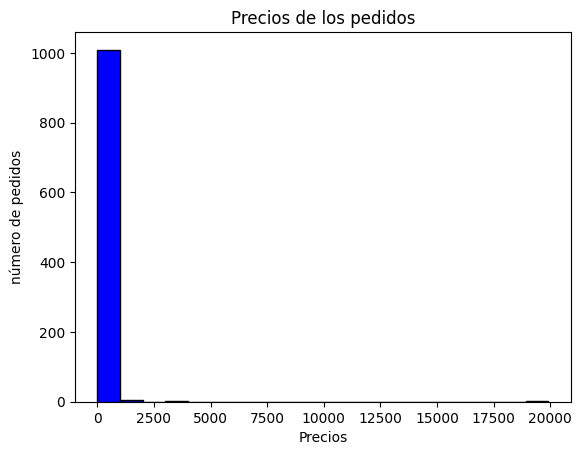

In [23]:
print(orders_filtrado.sort_values(by='revenue',ascending=False).head(10))

plt.hist(orders_filtrado['revenue'], bins=20, color='blue', edgecolor='black')
plt.title('Precios de los pedidos')
plt.xlabel('Precios')
plt.ylabel('número de pedidos')

# Muestra el gráfico
plt.show()



La mayoría de los pedidos son de menos de $2.500. Sin embargo, no se puede decir nada sobre los pedidos más grandes o la distribución de los más pequeños a partir de este histograma.

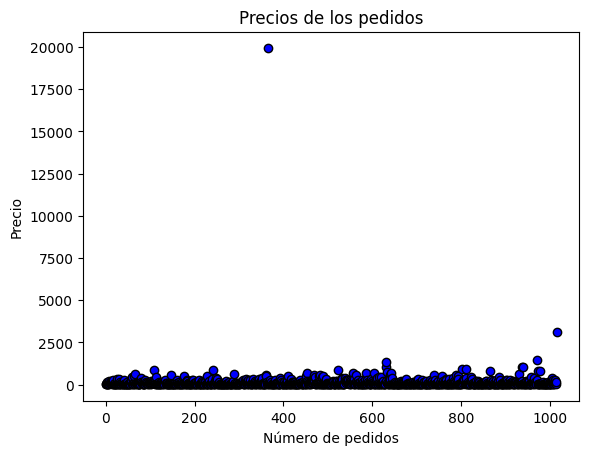

In [24]:
x_values = pd.Series(range(0,len(orders_filtrado['revenue'])))

plt.scatter(x_values, orders_filtrado['revenue'], color='blue', edgecolor='black')

# Añade títulos y etiquetas
plt.title('Precios de los pedidos')
plt.xlabel('Número de pedidos')
plt.ylabel('Precio')

# Muestra el gráfico
plt.show()

La mayoría de los pedidos son de menos de 2500 unidades monetarias. El pedido que está entre de 2500 y 5000 parece bastante anómalo.

**Calcula los percentiles 95 y 99 de los precios de los pedidos. Define el punto en el cual un punto de datos se convierte en una anomalía.**

In [25]:
print(orders_filtrado.head(10))

print(np.percentile(orders_filtrado['revenue'], [95,99]))

    transactionId   visitorId       date  revenue group
0      3667963787  3312258926 2019-08-15     30.4     B
1      2804400009  3642806036 2019-08-15     15.2     B
3      3797467345  1196621759 2019-08-15    155.1     B
4      2282983706  2322279887 2019-08-15     40.5     B
5       182168103   935554773 2019-08-15     35.0     B
6       398296753  2900797465 2019-08-15     30.6     B
7      2626614568    78758296 2019-08-15     20.1     A
8      1576988021   295230930 2019-08-15    215.9     A
9      1506739906  1882260405 2019-08-15     30.5     B
10     3649131742   879864040 2019-08-15     65.7     A
[414.275 830.3  ]


No más del 5% de los usuarios realizaron pedidos que costaron más de 414.2 unidades monetarias. No más del 1 porciento realizaron pedidos más caros que 830.3 unidades monetarias.

**Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos en bruto**

Hipotesis:

1. Formular la hipotesis nula y alternativa:
* HO: No hay diferencia significativa entre el grupo A y el grupo B.
* H1: Hay alguna diferencia entre el grupo A y el grupo B.

2. Usamos el nivel de significancia estandar de $\alpha$ de 0.5

In [26]:
ordersByUsersA = (
    orders_filtrado[orders_filtrado['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders_filtrado[orders_filtrado['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)
sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('{0:.3f}'.format(sampleB.mean() / sampleA.mean() - 1))

0.01102
0.160


El valor p es inferior a 0.05 por lo que rechazamos la hipótesis nula. El análisis de datos sin procesar mostró que las tasas de conversión de los grupos tienen diferencias estadísticamente significativas. La ganancia de conversión relativa del grupo B en comparación con el grupo A es del 16%.

**Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos en bruto. Haz conclusiones y conjeturas.**

In [27]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders_filtrado[orders_filtrado['group'] == 'A']['revenue'],
            orders_filtrado[orders_filtrado['group'] == 'B']['revenue'],
        )[1]
    )
)
print(
    '{0:.3f}'.format(
        orders_filtrado[orders_filtrado['group'] == 'B']['revenue'].mean()
        / orders_filtrado[orders_filtrado['group'] == 'A']['revenue'].mean()
        - 1
    )
)

0.862
0.278


El valor p es superior a 0.05 por lo que no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos. Además, la diferencia relativa es del 27.8%.

**Encuentra la significancia estadística de la diferencia en la conversión entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

Anteriormente, calculamos que los percentiles 95 y 99 para el tamaño promedio de pedido fueron 414 y 830 unidades monetarias. Para el número de usuarios, los percentiles 95 y 99 fueron de 1 y 2 pedidos.

Consideraremos usuarios anómalos a aquellos que realizaron dos o más pedidos o realizaron ordenes de más de $500. Así, eliminaremos el 1 porciento de los usuarios con más pedidos y entre el 1 porciento y el 5 porciento de los pedidos más caros.

In [28]:
#Crea slices de datos para usuarios con dos o más pedidos (usersWithManyOrders) y usuarios con pedidos de más de $500 (usersWithExpensiveOrders). 

usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId'],
    ],
    axis=0,
)

usersWithExpensiveOrders = orders_filtrado[orders_filtrado['revenue'] > 500]['visitorId']

#Lo unimos en la tabla abnormalUsers, eliminamos los duplicados y ordenamos los datos en orden ascendente.

abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

#Imprimir el conjunto de datos anómalos

print(abnormalUsers.head(5))

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
Name: visitorId, dtype: int64


In [29]:
#Eliminamos los visitantes anómalos y calculamos la significancia estadística de la diferencia en la conversión.


sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'A']['visits'].sum()
                - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visits[visits['group'] == 'B']['visits'].sum()
                - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print(
    "{0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1])
)
print("{0:.3f}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

0.00746
0.193


Al igual que con los datos sin procesar, el valor p es inferior a 0.05 por lo que rechazamos la hipótesis nula. El segmento B es mucho mejor que el segmento A.

**Encuentra la significancia estadística de la diferencia en el tamaño promedio de pedido entre los grupos utilizando los datos filtrados. Haz conclusiones y conjeturas.**

In [30]:
print(
    "{0:.3f}".format(
        stats.mannwhitneyu(
            orders_filtrado[
                np.logical_and(
                    orders_filtrado['group'] == 'A',
                    np.logical_not(orders_filtrado['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders_filtrado[
                np.logical_and(
                    orders_filtrado['group'] == 'B',
                    np.logical_not(orders_filtrado['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders_filtrado[
            np.logical_and(
                orders_filtrado['group'] == 'B',
                np.logical_not(orders_filtrado['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders_filtrado[
            np.logical_and(
                orders_filtrado['group'] == 'A',
                np.logical_not(orders_filtrado['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)


0.889
-0.001


Al igual que con los datos en bruto, el valor p es superior a 0.05 por lo que no existen diferencias estadísticamente significativas entre los tamaños de pedido promedio de los grupos. Esto significa que eliminar los valores atípicos no disminuyó la cantidad de ruido en los datos. Además, la diferencia relativa es -0.1%

**Toma una decisión basada en los resultados de la prueba. Las decisiones posibles son: 1. Para la prueba, considera a uno de los grupos como líder. 2. Para la prueba, concluye que no hay diferencia entre los grupos. 3. Continúa la prueba.**

* Ni los datos sin procesar ni los filtrados revelaron diferencias estadísticamente significativas en la conversión entre los grupos.
* Ni los datos sin procesar ni los filtrados revelaron diferencias estadísticamente significativas en el tamaño promedio de los pedidos entre los grupos.
* El gráfico que muestra la diferencia de conversión entre los grupos nos dice que los resultados del grupo B son mejores y parecieron mejorar significativamente:

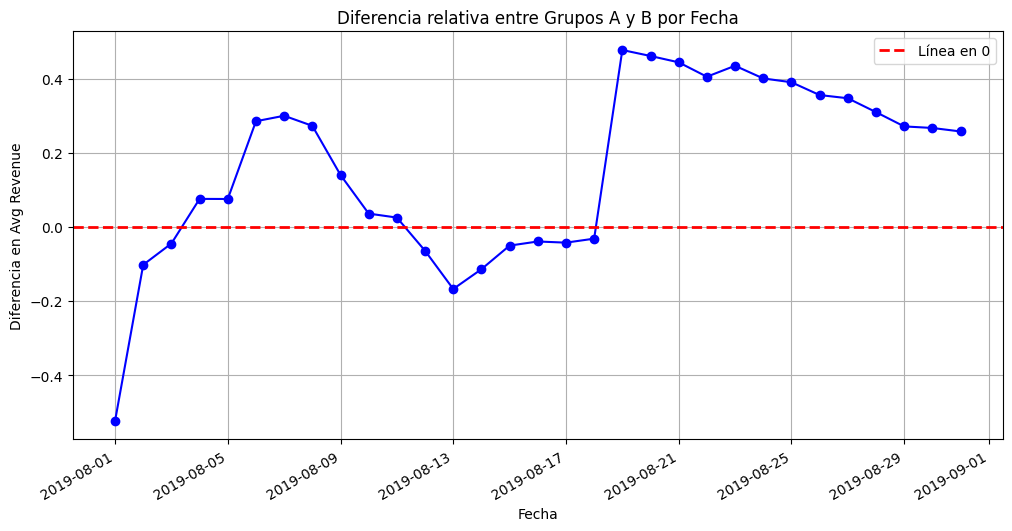

In [31]:
# Crea el gráfico
plt.figure(figsize=(12, 6))  # Tamaño del gráfico
plt.plot(daily_avgs_by_group.index, daily_avgs_by_group['difference'], marker='o', linestyle='-', color='b')

# Añade una línea horizontal en y=0
plt.axhline(y=0, color='r', linestyle='--', linewidth=2, label='Línea en 0')

# Añade títulos y etiquetas
plt.title('Diferencia relativa entre Grupos A y B por Fecha')
plt.xlabel('Fecha')
plt.ylabel('Diferencia en Avg Revenue')
plt.grid(True)

# Ajusta el formato de las fechas en el eje x si es necesario
plt.gcf().autofmt_xdate()

# Añade una leyenda para la línea horizontal
plt.legend()

# Muestra el gráfico
plt.show()

Basándonos en estos hechos, podemos concluir que la prueba fue exitosa, sin embargo esta debe continuar, dado que no se alcanza a percibir una estabiliadad constante del grupo B sobre el grupo A.